In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

%matplotlib inline

In [2]:
train_model = pd.read_csv('../datasets/train_cleaning.csv')
train_model.head()

,id,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,...,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_RFn,garage_finish_Unf,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA
0,109,6,1976,2005,289.0,725.0,725,1479,2,6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,544,7,1996,1997,132.0,913.0,913,2122,2,8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,153,5,1953,2007,0.0,1057.0,1057,1057,1,5,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,318,5,2006,2007,0.0,384.0,744,1444,2,7,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,255,6,1900,1993,0.0,676.0,831,1445,2,6,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Model 1

In [3]:
X = train_model.drop(columns = ['id','saleprice'])
y = train_model['saleprice']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
lr_scores = cross_val_score(lr, X_train, y_train, cv = 5)
lr_scores.mean()

0.8208199451078052

In [6]:
lr.score(X_train, y_train)

0.8607828407527225

In [7]:
lr.score(X_test, y_test)

0.8677778732496824

- 86.8% of the variability in sale price can be explained by the X's in our model 1.
- the score of test value is a little higher than the score of train value, the model is underfit. 

In [8]:
predictions = lr.predict(X_test)

In [27]:
mean_squared_error(y_test, predictions)

811847128.1412554

In [26]:
np.sqrt(mean_squared_error(y_test, predictions))

28492.931196022204

In [24]:
mean_absolute_error(y_test, predictions)

20148.9089703707

- the mean square error, mean absolute error, and root mean square error of this model are large. Need to decrease the value of those metrics. Maybe remove some outliers. 

In [10]:
lr.coef_

array([ 1.28426301e+04,  1.07945989e+02,  1.81801497e+02,  2.10473182e+01,
        6.12660277e+00, -1.33145265e+01,  5.30454604e+01,  2.83409896e+03,
        1.43257159e+03, -7.99312724e+01,  9.59227278e+03,  7.43129020e+00,
        6.27339407e+03, -6.49215040e+04, -2.31959947e+03,  3.17356741e+04,
        2.50812596e+04,  1.77964915e+04,  6.46059919e+03, -9.63072315e+03,
        1.21674764e+03, -5.67860270e+02,  1.15487266e+04,  2.84382020e+03,
        2.12578686e+03,  1.13629690e+04,  2.45715922e+04,  3.10499192e+04,
       -7.73407705e+03,  7.48230611e+03, -2.67410857e+04, -1.79732102e+04,
       -1.19098075e+04, -1.60802133e+04, -2.25105599e+04, -1.89517282e+04,
        2.04382733e+04,  1.07612404e+04,  5.12861521e+04, -3.20461889e+03,
       -5.59296314e+03,  2.88694004e+03, -9.06143706e+03,  1.87122680e+04,
        3.00690494e+04,  2.50295208e+04, -3.39734242e+04,  2.66029998e+04,
       -6.84896279e+04, -4.69461419e+04, -5.95302667e+04, -2.17368026e+04,
       -1.40586239e+04, -

In [28]:
list(zip(X.columns,lr.coef_))

[('overall_qual', 12842.630112331683),
 ('year_built', 107.94598877220118),
 ('year_remod/add', 181.80149705955196),
 ('mas_vnr_area', 21.04731815399424),
 ('total_bsmt_sf', 6.12660277024122),
 ('1st_flr_sf', -13.314526493361825),
 ('gr_liv_area', 53.04546038998137),
 ('full_bath', 2834.098959920085),
 ('totrms_abvgrd', 1432.571588776067),
 ('garage_yr_blt', -79.93127237428052),
 ('garage_cars', 9592.27277982144),
 ('garage_area', 7.4312901950470405),
 ('lot_shape_IR2', 6273.394070187391),
 ('lot_shape_IR3', -64921.50396065679),
 ('lot_shape_Reg', -2319.599466286789),
 ('land_contour_HLS', 31735.67413494951),
 ('land_contour_Low', 25081.25958554681),
 ('land_contour_Lvl', 17796.49152559343),
 ('lot_config_CulDSac', 6460.599190492689),
 ('lot_config_FR2', -9630.723151067776),
 ('lot_config_FR3', 1216.7476354357696),
 ('lot_config_Inside', -567.8602700284537),
 ('land_slope_Mod', 11548.726600431919),
 ('land_slope_Sev', 2843.8202013476093),
 ('condition_1_Feedr', 2125.786858243533),
 ('c

- Features that have positive coefficient indicate as the value of those features increase, the price of the house will increase. For example, if hold the other features in constant, for every  1 square feet increase in the total basement area, the price of house increase by 6 dollars.
- Features that have positive coefficient indicate as the value of those features increase, the price of the house will decrease. 

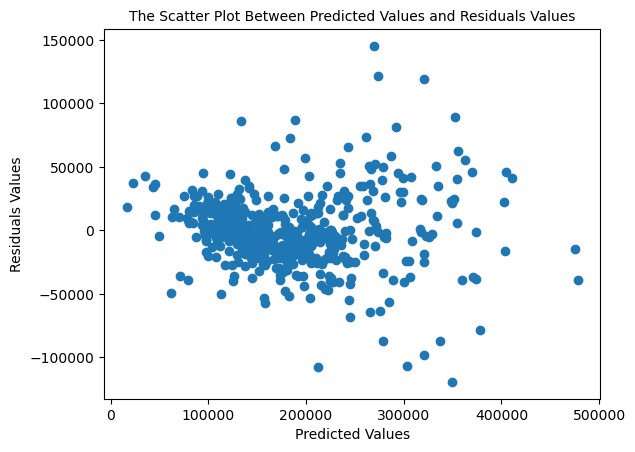

In [37]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.title("The Scatter Plot Between Predicted Values and Residuals Values", size=10)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals Values");

#### Ridge and Lasso

In [31]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [34]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [36]:
ridge = ridge.fit(X_train_sc,y_train)

In [37]:
ridge.score(X_train_sc, y_train)

0.8604652560127091

In [38]:
ridge.score(X_test_sc, y_test)

0.8701352688605958

In [39]:
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv = 5)
ridge_scores.mean()

0.8213380778594106

- the test score is increase, the train score is decrease comparing to the linear model

In [40]:
ridge.alpha_ #the alpha give the best model in the alpha range above

10.0

In [42]:
list(zip(X.columns, ridge.coef_))

[('overall_qual', 18483.777962869102),
 ('year_built', 3386.9484260628396),
 ('year_remod/add', 3945.826786974709),
 ('mas_vnr_area', 3991.738909000501),
 ('total_bsmt_sf', 2945.746392876821),
 ('1st_flr_sf', -3317.592128929115),
 ('gr_liv_area', 24127.274387497015),
 ('full_bath', 1691.9268677436833),
 ('totrms_abvgrd', 2757.799627691469),
 ('garage_yr_blt', -1773.3731802534166),
 ('garage_cars', 6737.488943236647),
 ('garage_area', 2141.0308935703715),
 ('lot_shape_IR2', 943.7220448427555),
 ('lot_shape_IR3', -4340.329404328145),
 ('lot_shape_Reg', -1104.5516508071646),
 ('land_contour_HLS', 6320.184660181934),
 ('land_contour_Low', 3364.1010252329565),
 ('land_contour_Lvl', 5110.551161322051),
 ('lot_config_CulDSac', 1579.0196505747115),
 ('lot_config_FR2', -1604.3976483024837),
 ('lot_config_FR3', 35.97378925295567),
 ('lot_config_Inside', -230.974773740113),
 ('land_slope_Mod', 2284.408820875864),
 ('land_slope_Sev', 162.59518768748902),
 ('condition_1_Feedr', 383.2291381010306),


- the coefficient of the ridge is different compare to linear regression. For example, the coefficient of total basement square feet in ridge model is much higher than linear model.

In [43]:
predictions_r1 = ridge.predict(X_test_sc)

In [44]:
mean_squared_error(y_test, predictions_r1)

797372660.7911203

In [45]:
np.sqrt(mean_squared_error(y_test, predictions_r1))

28237.78781687971

In [46]:
mean_absolute_error(y_test, predictions_r1)

20076.860088421836

- mean_squared_error,root mean_squared_error, and mean_absolute_error are smaller in the ridge model compare to linear model.

In [47]:
lasso = LassoCV(n_alphas=200)

In [48]:
lasso = lasso.fit(X_train_sc, y_train)

In [49]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv = 5)
lasso_scores.mean()

0.819539644034484

In [50]:
lasso.score(X_train_sc, y_train)

0.8603060457917281

In [51]:
lasso.score(X_test_sc, y_test)

0.8718519106660529

In [55]:
list(zip(X.columns,lasso.coef_))

[('overall_qual', 18565.827638133833),
 ('year_built', 3309.710084901464),
 ('year_remod/add', 3861.05512875563),
 ('mas_vnr_area', 3764.439573333201),
 ('total_bsmt_sf', 2669.6411764182576),
 ('1st_flr_sf', -3537.0402994452775),
 ('gr_liv_area', 25327.441833358425),
 ('full_bath', 1381.5943834184468),
 ('totrms_abvgrd', 2072.640973029716),
 ('garage_yr_blt', -1280.764378871261),
 ('garage_cars', 7071.491058671405),
 ('garage_area', 1517.430854859835),
 ('lot_shape_IR2', 889.6654973175871),
 ('lot_shape_IR3', -4349.053592719676),
 ('lot_shape_Reg', -1051.6815348667067),
 ('land_contour_HLS', 6163.188114362101),
 ('land_contour_Low', 3279.3231464785777),
 ('land_contour_Lvl', 4947.155398110125),
 ('lot_config_CulDSac', 1597.9174392683465),
 ('lot_config_FR2', -1500.7022772133587),
 ('lot_config_FR3', 5.559953103207579),
 ('lot_config_Inside', -118.21874739497598),
 ('land_slope_Mod', 2117.5388103883847),
 ('land_slope_Sev', 70.88007799144202),
 ('condition_1_Feedr', 66.51038986393071),


- some of the coefficient in the lasso model is 0. 

In [68]:
predictions_l1 = lasso.predict(X_test_sc)

In [69]:
mean_squared_error(y_test, predictions_l1)

786832437.6525278

In [70]:
np.sqrt(mean_squared_error(y_test, predictions_l1))

28050.53364291895

In [71]:
mean_absolute_error(y_test, predictions_l1)

19918.72015777624

### Model 2 - change the alpha of ridge and lasso model 

#### keep the linear regression the same

In [58]:
ridge_2 = RidgeCV(alphas = np.logspace(1,10,100))

In [60]:
ridge_2 = ridge_2.fit(X_train_sc,y_train)

In [61]:
ridge_2.score(X_train_sc, y_train)

0.860153747916093

In [62]:
ridge_2.score(X_test_sc, y_test)

0.8708378678333742

In [63]:
ridge_scores_2 = cross_val_score(ridge_2, X_train_sc, y_train, cv = 5)
ridge_scores_2.mean()

0.8185072398368156

In [64]:
ridge_2.alpha_

15.199110829529339

In [65]:
list(zip(X.columns,ridge_2.coef_))

[('overall_qual', 18520.82880359956),
 ('year_built', 3436.33633804762),
 ('year_remod/add', 4007.030726366353),
 ('mas_vnr_area', 4119.61189070283),
 ('total_bsmt_sf', 3031.6845244227975),
 ('1st_flr_sf', -2494.924338440915),
 ('gr_liv_area', 23001.529087496237),
 ('full_bath', 1742.2828522034981),
 ('totrms_abvgrd', 2977.323133546387),
 ('garage_yr_blt', -1677.5357916988346),
 ('garage_cars', 6503.71658263257),
 ('garage_area', 2363.827585098175),
 ('lot_shape_IR2', 934.7608508219015),
 ('lot_shape_IR3', -4328.0056030940195),
 ('lot_shape_Reg', -1100.9543139471555),
 ('land_contour_HLS', 6268.379264411903),
 ('land_contour_Low', 3292.4180176812006),
 ('land_contour_Lvl', 4977.535915164923),
 ('lot_config_CulDSac', 1591.9964716644215),
 ('lot_config_FR2', -1587.0632653091648),
 ('lot_config_FR3', 24.93679026789188),
 ('lot_config_Inside', -224.03294311332763),
 ('land_slope_Mod', 2272.548959571009),
 ('land_slope_Sev', 152.7457374965676),
 ('condition_1_Feedr', 341.8012296293887),
 ('

In [ ]:
predictions_r2 = ridge_2.predict(X_test_sc)

In [ ]:
mean_squared_error(y_test, predictions_r2)

In [ ]:
np.sqrt(mean_squared_error(y_test, predictions_r2))

In [ ]:
mean_absolute_error(y_test, predictions_r2)

Modeling using Lasso

In [17]:
lasso_2 = LassoCV(alphas = np.logspace(-3,0,100))
lasso_2 = lasso_2.fit(X_train_sc, y_train)

In [18]:
lasso_scores_2 = cross_val_score(lasso_2, X_train_sc, y_train, cv = 5)
lasso_scores_2.mean()

0.820845776814228

In [19]:
lasso_2.score(X_train_sc, y_train)

0.8607826780613012

In [20]:
lasso_2.score(X_test_sc, y_test)

0.8678548339427786

In [66]:
list(zip(X.columns,lasso_2.coef_))

[('overall_qual', 18565.827638133833),
 ('year_built', 3309.710084901464),
 ('year_remod/add', 3861.05512875563),
 ('mas_vnr_area', 3764.439573333201),
 ('total_bsmt_sf', 2669.6411764182576),
 ('1st_flr_sf', -3537.0402994452775),
 ('gr_liv_area', 25327.441833358425),
 ('full_bath', 1381.5943834184468),
 ('totrms_abvgrd', 2072.640973029716),
 ('garage_yr_blt', -1280.764378871261),
 ('garage_cars', 7071.491058671405),
 ('garage_area', 1517.430854859835),
 ('lot_shape_IR2', 889.6654973175871),
 ('lot_shape_IR3', -4349.053592719676),
 ('lot_shape_Reg', -1051.6815348667067),
 ('land_contour_HLS', 6163.188114362101),
 ('land_contour_Low', 3279.3231464785777),
 ('land_contour_Lvl', 4947.155398110125),
 ('lot_config_CulDSac', 1597.9174392683465),
 ('lot_config_FR2', -1500.7022772133587),
 ('lot_config_FR3', 5.559953103207579),
 ('lot_config_Inside', -118.21874739497598),
 ('land_slope_Mod', 2117.5388103883847),
 ('land_slope_Sev', 70.88007799144202),
 ('condition_1_Feedr', 66.51038986393071),


In [ ]:
predictions_l2 = lasso_2.predict(X_test_sc)

In [ ]:
mean_squared_error(y_test, predictions_l2)

In [ ]:
np.sqrt(mean_squared_error(y_test, predictions_l2))

In [ ]:
mean_absolute_error(y_test, predictions_l2)

The lasso mean of cross_val_score is higher than ridge

In [21]:
test_model = pd.read_csv('../datasets/test_cleaning.csv')
test_model.head()

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,...,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_RFn,garage_finish_Unf,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA
0,6,1910,1950,0.0,1020,908,1928,2,9,1910.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5,1977,1977,0.0,1967,1967,1967,2,10,1977.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7,2006,2006,0.0,654,664,1496,2,7,2006.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,5,1923,2006,0.0,968,968,968,1,5,1935.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,6,1963,1963,247.0,1394,1394,1394,1,6,1963.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [22]:
#X_pred = [[col for col in test._get_numeric_data().columns if col != 'id']]

#predictions = lr.predict(test_model)

predictions = lr.predict(test_model)

In [23]:
test = pd.read_csv('../datasets/test.csv')

In [24]:
test_preds_df = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predictions
})

test_preds_df.head()

,Id,SalePrice
0,2658,118192.749611
1,2718,164732.206429
2,2414,216325.656846
3,1989,132949.416565
4,625,170653.728759


In [25]:
test_preds_df.to_csv('../datasets/model_3.csv', index=False)